In [21]:
from __future__ import print_function
from pathlib import Path
import itertools
import mdtraj as md
import mdtraj.testing
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
result_dir = Path("./results/EGPR_tutorial")
top = md.load_pdb(str(result_dir / "3POZ_03P_minimized.pdb"))
t = md.load_xtc(str(result_dir / "3POZ_03P_3rd_trajectory.xtc"), top=top.top)
print(t)

<mdtraj.Trajectory with 250 frames, 52862 atoms, 16273 residues, and unitcells>


In [23]:
hbonds = md.baker_hubbard(t, periodic=False)
hbonds.shape

(437, 3)

In [24]:
print(t.topology.atom(hbonds[0,0]), t.topology.atom(hbonds[0,1]), t.time[0])
print(t.topology.atom(hbonds[1,0]), t.topology.atom(hbonds[1,1]), t.time[0])

ALA2-N ALA2-H 2.0
ARG5-N ARG5-H 2.0


In [39]:
labels = dict()
for i, hbond in enumerate(hbonds):
    resname = t.topology.atom(hbond[0]).residue.name
    resname2 = t.topology.atom(hbond[2]).residue.name
    if resname == "UNK" or resname2 == "UNK":
        if not (resname == "UNK" and resname2 == "UNK"):
            print(i, t.topology.atom(hbond[0]), t.topology.atom(hbond[2]))
            labels[str(i)] = f"{t.topology.atom(hbond[0])}-{t.topology.atom(hbond[2])}"
            

55 LYS45-NZ UNK1-O3x
112 MET93-N UNK1-N4x


In [40]:
da_distances = md.compute_distances(t, hbonds[:, [0, 2]], periodic=False)

LYS45-NZ-UNK1-O3x 0.46701905
MET93-N-UNK1-N4x 0.3164917


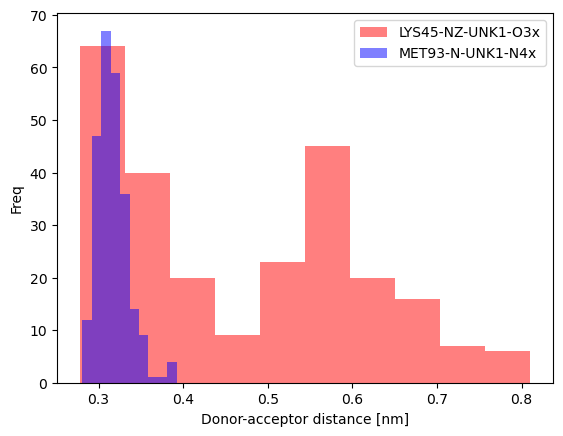

In [43]:
color = itertools.cycle(["r", "b"])
for i in [55, 112]:
    plt.hist(da_distances[:, i], color=next(color), label=labels[str(i)], alpha=0.5)
    print(labels[str(i)], da_distances[:, i].mean())
plt.legend()
plt.ylabel("Freq")
plt.xlabel("Donor-acceptor distance [nm]");